In [43]:
import pandas as pd
import json
import matplotlib as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('cfs_2012_pumf_csv.txt')
df.head()

,SHIPMT_ID,ORIG_STATE,ORIG_MA,ORIG_CFS_AREA,DEST_STATE,DEST_MA,DEST_CFS_AREA,NAICS,QUARTER,SCTG,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,EXPORT_YN,EXPORT_CNTRY,HAZMAT,WGT_FACTOR
0,1,25,148,25-148,25,148,25-148,333,2,35,14,2178,11,14,17,N,N,N,N,208.5
1,2,42,428,42-428,6,41740,06-41740,311,3,35,14,344,11,2344,2734,N,N,N,N,193.3
2,3,26,220,26-220,47,314,47-314,322,2,27,4,4197,5134,470,579,N,N,N,N,51.2
3,4,20,556,20-556,20,556,20-556,323,1,29,4,116,6,3,3,N,N,N,N,238.7
4,5,12,99999,12-99999,12,99999,12-99999,4235,3,33,5,388,527,124,201,N,N,N,N,398.1


# Transform

In [45]:
# wholesale, storage, fuel, online shopping, publishing, administration
def NAICS(x):
    if x >= 300 and x <= 400:
        return 'Manufacturing'
    elif x >= 4200 and x <= 4300:
        return 'Wholesale'
    elif x == 212:
        return 'Mining'
    elif x == 4541:
        return 'Online shopping'
    elif x == 45431:
        return 'Fuel'
    elif x == 4931:
        return 'Storage'
    elif x == 5111:
        return 'Publishing'
    else:
        return 'Administration'
    
df['NAICS_type'] = df['NAICS'].map(lambda x: NAICS(x))
df['NAICS_type'].value_counts()

Manufacturing      2149701
Wholesale          1882220
Mining              140933
Storage             101644
Fuel                101200
Online shopping      86257
Publishing           53137
Administration       32569
Name: NAICS_type, dtype: int64

In [46]:
def MODE(x):
    if x >= 3 and x <= 5:
        return 'Truck'
    elif x == 6:
        return 'Rail'
    elif x >= 7 and x <= 10 or x == 101:
        return 'Water'
    elif x == 11:
        return 'Air'
    elif x == 12:
        return 'Pipeline'
    elif x == 14:
        return 'Parcel'
    elif x == 15:
        return 'Truck and rail'
    else:
        return 'Other/multiple'

df['transportation_type'] = df['MODE'].map(lambda x: MODE(x))
df['transportation_type'].value_counts()
# data['MODE'].value_counts()

Truck             3231969
Parcel            1165297
Air                 68809
Rail                38458
Truck and rail      19070
Other/multiple      16489
Water                3896
Pipeline             3673
Name: transportation_type, dtype: int64

In [47]:
#transform export country
def new_country(x):
    if x == 'C':
        return 'Canada'
    elif x == 'M':
        return 'Mexico'
    elif x == 'N':
        return 'Domestic'
    elif x == 'O':
        return 'Other'
    
df['export_country'] = df['EXPORT_CNTRY'].map(lambda x: new_country(x))
df['export_country'].head()

0    Domestic
1    Domestic
2    Domestic
3    Domestic
4    Domestic
Name: export_country, dtype: object

In [91]:
df['SCTG'].value_counts()

35       318586
24       288078
43       283551
34       265539
40       264089
33       237139
30       213796
29       200529
32       187159
07       183021
36       183009
31       178753
26       161961
23       141016
19       133849
38       132035
08        98947
20        96474
28        95548
12        94363
39        86920
21        85890
05        62355
27        61999
18        60218
03        54265
06        53265
37        46078
04        45617
41        41610
17        38588
11        29142
02        24965
22        24300
09        16864
13        16795
15        11002
10         5883
25         4966
14         4211
01         2239
20-24      1888
25-30      1854
31-34      1473
01-05      1458
10-14      1437
06-09      1267
39-99      1190
35-38       919
15-19       856
00          691
99           14
Name: SCTG, dtype: int64

# Visualizations

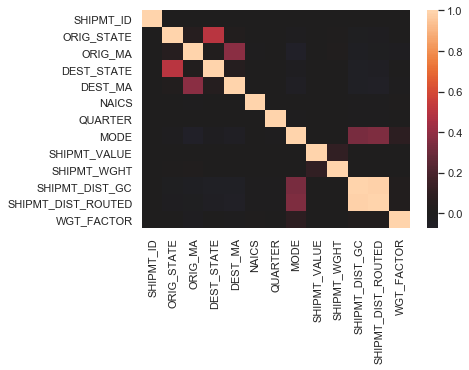

In [48]:
import seaborn as sns
sns.heatmap(df.corr(), center=0);

**Quarterly Shipment Value Visualizations**

In [54]:
#Groupby transportation type and shipment value
df_transp = df.groupby(['QUARTER','transportation_type']).agg({'SHIPMT_VALUE': 'mean'}).reset_index()
df_transp.head()

,QUARTER,transportation_type,SHIPMT_VALUE
0,1,Air,1.239745e+05
1,1,Other/multiple,2.118346e+05
2,1,Parcel,1.828712e+03
3,1,Pipeline,1.561808e+06
4,1,Rail,1.283185e+05


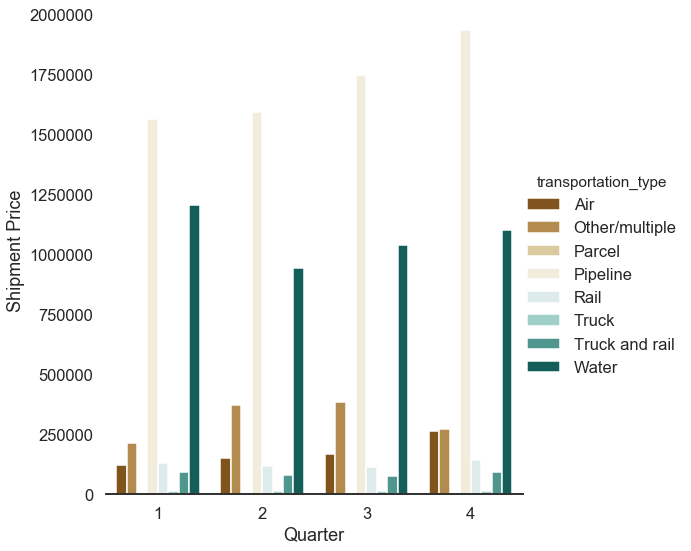

In [94]:
sns.set(style="white", context="talk")

g = sns.catplot(x='QUARTER', y='SHIPMT_VALUE', hue='transportation_type', data=df_transp, kind="bar", height = 8, palette="BrBG")
g.despine(left=True)

g.set_ylabels("Shipment Price")
g.set_xlabels("Quarter")

**Country Export Visualizations**

In [66]:
df_export = df.groupby(['export_country', 'NAICS_type']).agg({'SHIPMT_VALUE': 'mean'}).reset_index()
df_export.head()

,export_country,NAICS_type,SHIPMT_VALUE
0,Canada,Administration,20089.047244
1,Canada,Manufacturing,26212.400939
2,Canada,Mining,86310.653454
3,Canada,Online shopping,957.630601
4,Canada,Publishing,5097.045147


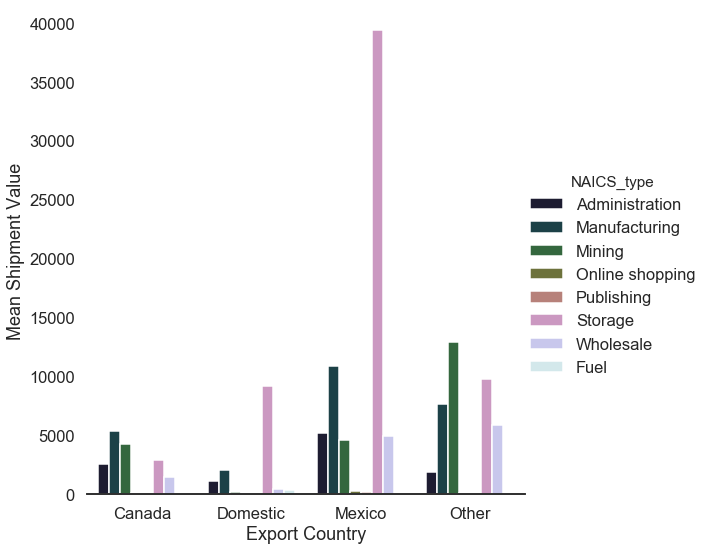

In [76]:
e = sns.catplot(x ='export_country', y='SHIPMT_VALUE', hue='NAICS_type',data=df_export, kind="bar", size=8, palette="cubehelix")
e.despine(left=True)
e.set_ylabels("Mean Shipment Value")
e.set_xlabels("Export Country")

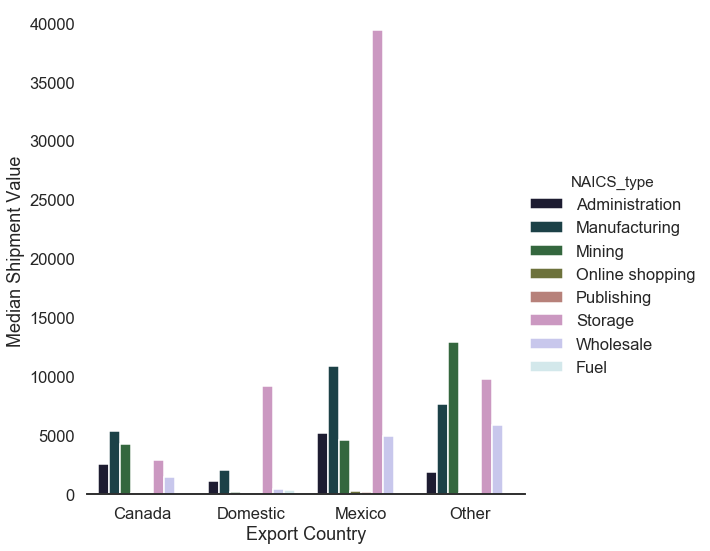

In [75]:
df_export = df.groupby(['export_country', 'NAICS_type']).agg({'SHIPMT_VALUE': 'median'}).reset_index()

f = sns.catplot(x ='export_country', y='SHIPMT_VALUE', hue='NAICS_type',data=df_export, kind="bar", size=8, palette="cubehelix")
f.despine(left=True)
f.set_ylabels("Median Shipment Value")
f.set_xlabels("Export Country")

Questions:
- What is the storage variable about?

**HAZMAT Visualizations**

In [61]:
df['HAZMAT'].value_counts()

N    4244682
H     169457
P     133522
Name: HAZMAT, dtype: int64

In [59]:
df_HAZ = df.groupby(['export_country', 'HAZMAT']).agg({'SHIPMT_VALUE': 'mean'}).reset_index()
df_HAZ

,export_country,HAZMAT,SHIPMT_VALUE
0,Canada,H,4.115800e+04
1,Canada,N,2.470138e+04
2,Canada,P,3.279493e+04
3,Domestic,H,1.386742e+04
4,Domestic,N,1.399596e+04
5,Domestic,P,7.715774e+04
6,Mexico,H,6.774386e+04
7,Mexico,N,4.071623e+04
8,Mexico,P,1.304211e+06
9,Other,H,9.430633e+04


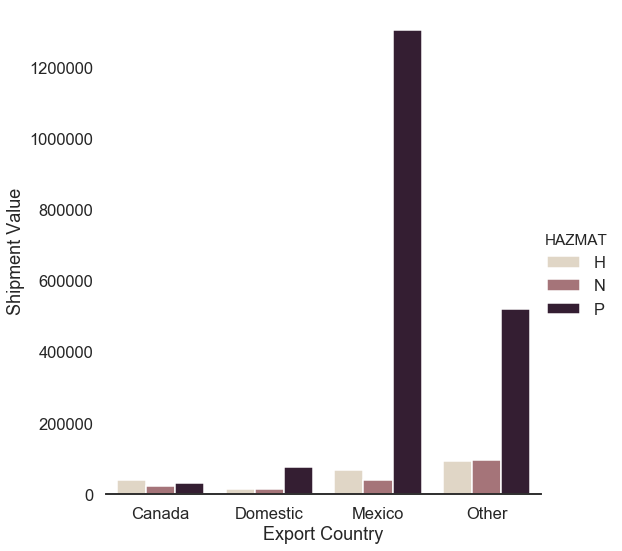

In [63]:
e = sns.catplot(x ='export_country', y='SHIPMT_VALUE', hue='HAZMAT',data=df_HAZ, kind="bar", size=8, palette="ch:.27")
e.despine(left=True)
e.set_ylabels("Shipment Value")
e.set_xlabels("Export Country")

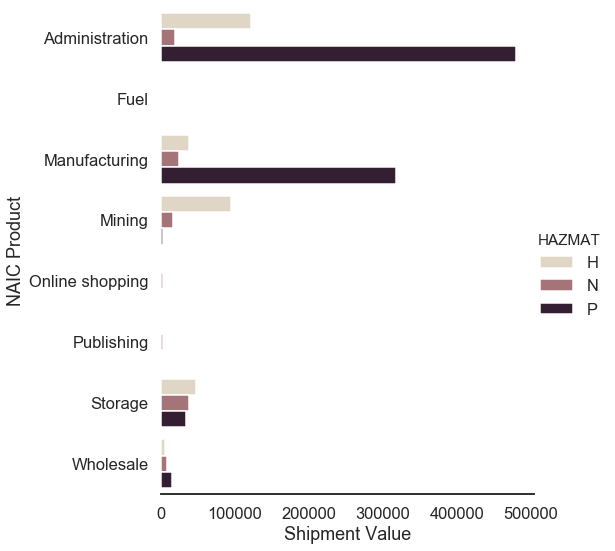

In [79]:
df_HAZ_ = df.groupby(['NAICS_type', 'HAZMAT']).agg({'SHIPMT_VALUE': 'mean'}).reset_index()
e = sns.catplot(y ='NAICS_type', x='SHIPMT_VALUE', hue='HAZMAT',data=df_HAZ_, kind="bar", size=8, palette="ch:.27")
e.despine(left=True)
e.set_ylabels("NAIC Product")
e.set_xlabels("Shipment Value")

Questions:
- significant 

**Others:**


In [ ]:
# # Load the example car crash dataset
# crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="NAICS_type", y="ORIG_STATE", data=df,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
# sns.set_color_codes("muted")
# sns.barplot(x="alcohol", y="abbrev", data=crashes,
#             label="Alcohol-involved", color="b")